# Air Quality and Weather Data Analysis

This notebook performs **initial exploratory data analysis** on three provided datasets:
- Pollen data (`EPHT_Pollen_Data.csv`)
- Air pollutant and AQI data (`boston_pollutants_with_aqi.csv`)
- Weather data (`boston-weather-data(open_meteo).csv`)

We'll focus on:
- Visualizing data distributions (histograms)
- Identifying missing data patterns (heat maps)


In [ ]:
# make a venv and pip install all dependencies first
# commands:
# python -m venv venv
# venv\Scripts\activate
# pip install pandas matplotlib seaborn missingno numpy ipython

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from IPython.display import HTML, display

# Set up plotting style for better aesthetics
sns.set_theme(style="whitegrid")

In [7]:
data_path = 'data/'
POLLEN_FILE = data_path + 'EPHT_Pollen_Data.csv'
POLLUTANTS_FILE = data_path + 'boston_pollutants_with_aqi.csv'
WEATHER_FILE = data_path + 'boston-weather-data(open_meteo).csv'

In [8]:
try:
    df_pollen = pd.read_csv(POLLEN_FILE)
    df_pollutants = pd.read_csv(POLLUTANTS_FILE)
    df_weather = pd.read_csv(WEATHER_FILE, header=2)  # skip first 2 metadata rows

    print(f"✅ Loaded {POLLEN_FILE}: {df_pollen.shape}")
    print(f"✅ Loaded {POLLUTANTS_FILE}: {df_pollutants.shape}")
    print(f"✅ Loaded {WEATHER_FILE}: {df_weather.shape}")

except FileNotFoundError as e:
    print(f"❌ Error loading file: {e}. Please ensure all CSV files are correctly uploaded.")
except Exception as e:
    print(f"⚠️ Unexpected error during loading: {e}")

✅ Loaded data/EPHT_Pollen_Data.csv: (2176, 15)
✅ Loaded data/boston_pollutants_with_aqi.csv: (5478, 14)
✅ Loaded data/boston-weather-data(open_meteo).csv: (9132, 7)


In [9]:
df_pollutants['date'] = pd.to_datetime(df_pollutants['date'])
df_weather.rename(columns={'time': 'date'}, inplace=True)
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_pollen['Date'] = pd.to_datetime(df_pollen['Date'])

print("✅ Date columns standardized and converted to datetime format.")

✅ Date columns standardized and converted to datetime format.


## Missing Data Analysis: Pollutants Dataset
White lines indicate missing data points.  
The heatmap shows **nullity correlations** (values near 1 mean columns tend to be missing together).


In [10]:
def visualize_missingness(df, name, color=(0.3, 0.5, 0.7)):
    """
    Generate missing data visualizations and summaries.
    - Displays a summary of missing counts per column.
    - Shows a missing data matrix (white = missing).
    - If missingness exists, shows a nullity correlation heatmap.
    """

    # Matrix visualization (white = missing)
    msno.matrix(df, color=color, sparkline=False, figsize=(5, 4), fontsize=8, )
    plt.title(f'Missing Data Matrix: {name}', pad=10)
    plt.tight_layout()
    display(HTML("<div style='margin-top:40px;'></div>"))
    plt.show()

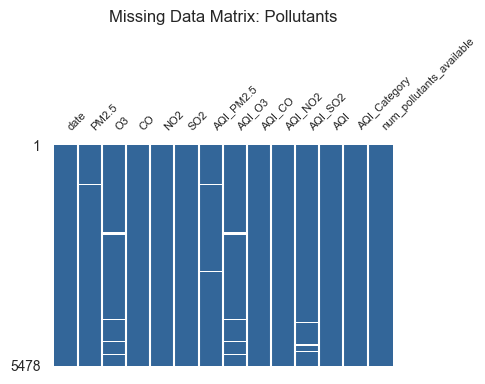

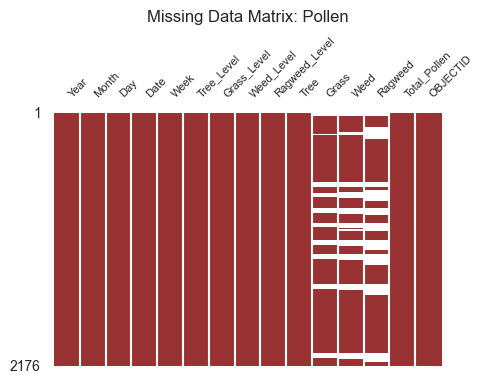

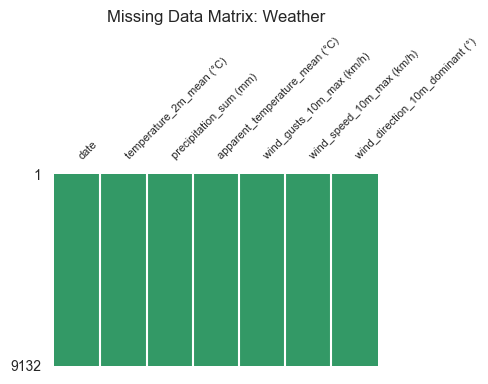

In [11]:
visualize_missingness(df_pollutants, "Pollutants", color=(0.2, 0.4, 0.6))
visualize_missingness(df_pollen, "Pollen", color=(0.6, 0.2, 0.2))
visualize_missingness(df_weather, "Weather", color=(0.2, 0.6, 0.4))

# Data Distribution Analysis

These histograms show how the numerical variables are distributed.
We add **mean (red dashed)** and **median (green solid)** lines for reference.

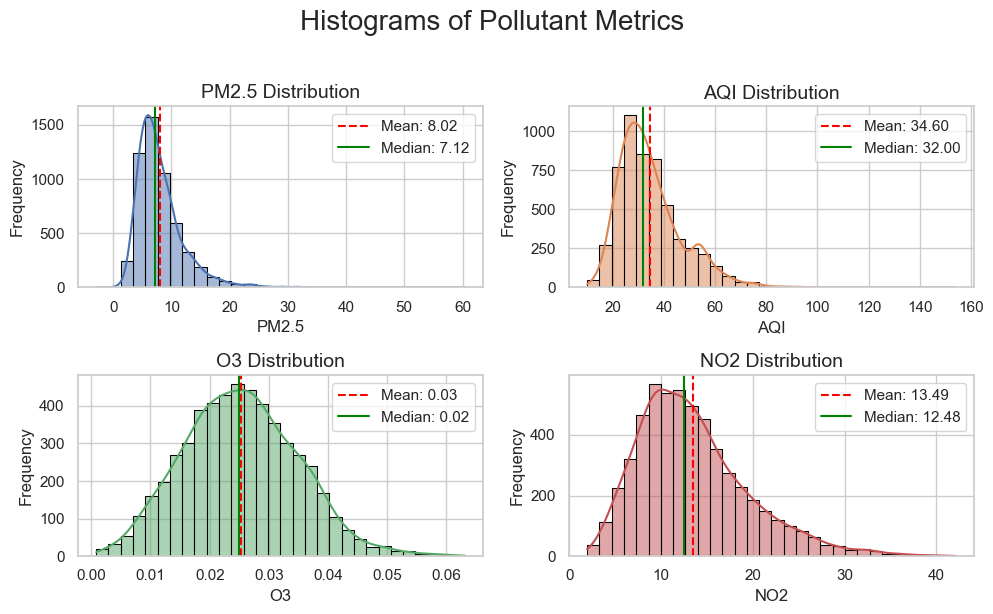

In [12]:
pollutant_cols = ['PM2.5', 'AQI', 'O3', 'NO2']

plt.figure(figsize=(10, 6))
for i, col in enumerate(pollutant_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_pollutants[col].dropna(), kde=True, bins=30,
                 color=sns.color_palette("deep")[i], edgecolor='black')

    mean_val = df_pollutants[col].mean()
    median_val = df_pollutants[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_val:.2f}')

    plt.title(f'{col} Distribution', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.suptitle('Histograms of Pollutant Metrics', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

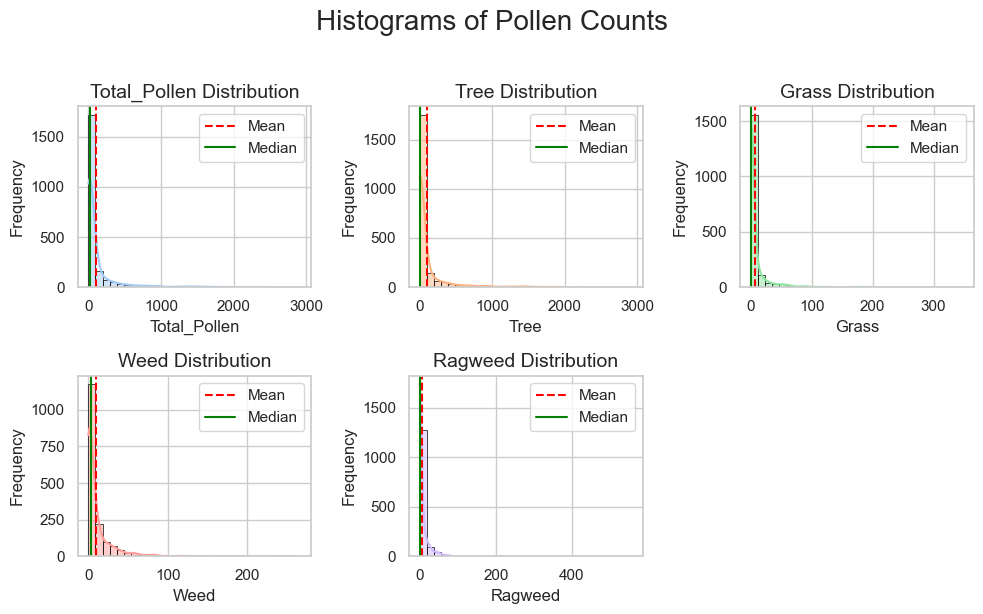

In [13]:
pollen_cols = ['Total_Pollen', 'Tree', 'Grass', 'Weed', 'Ragweed']

plt.figure(figsize=(10, 6))
for i, col in enumerate(pollen_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_pollen[col].dropna(), kde=True, bins=30,
                 color=sns.color_palette("pastel")[i], edgecolor='black')

    mean_val = df_pollen[col].mean()
    median_val = df_pollen[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label='Mean')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label='Median')

    plt.title(f'{col} Distribution', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.suptitle('Histograms of Pollen Counts', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

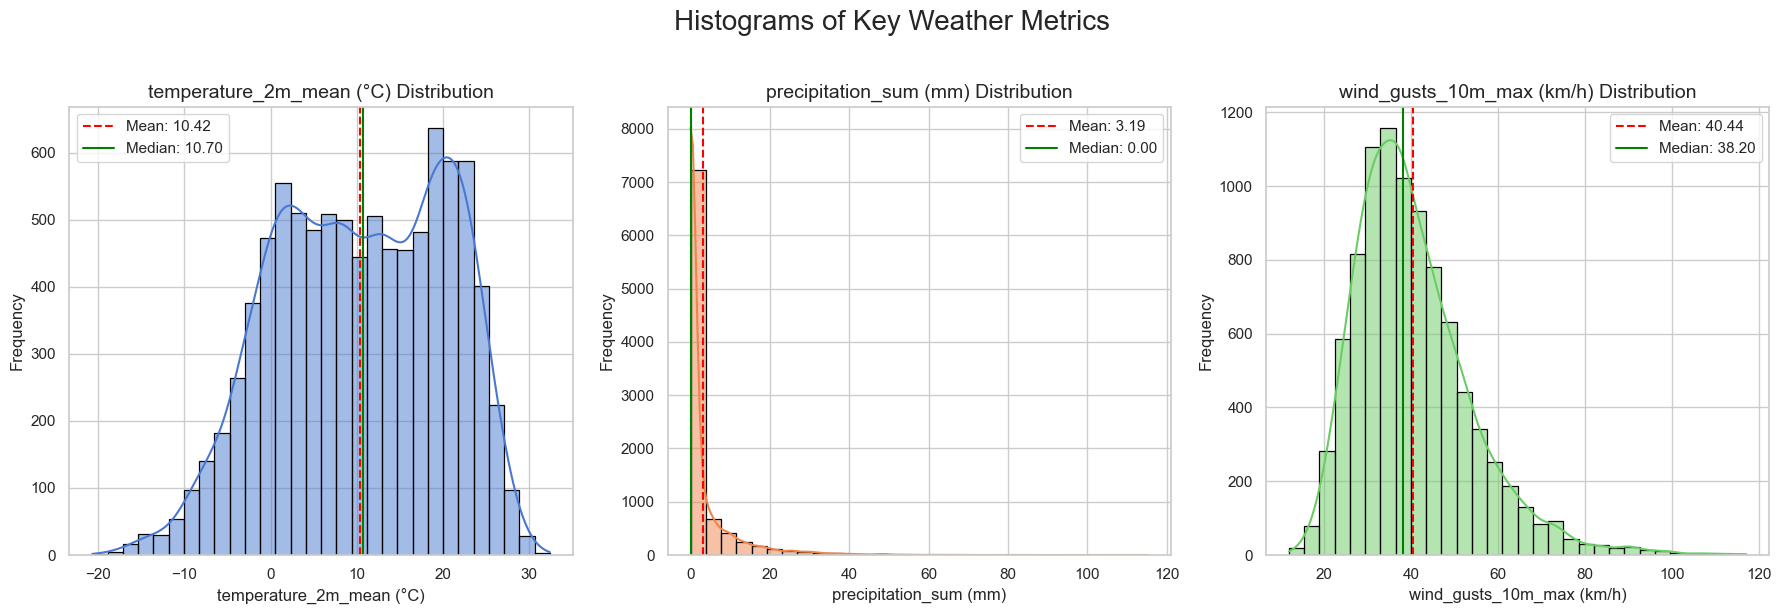

In [14]:
weather_cols = [
    'temperature_2m_mean (°C)',
    'precipitation_sum (mm)',
    'wind_gusts_10m_max (km/h)'
]

plt.figure(figsize=(18, 6))
for i, col in enumerate(weather_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_weather[col].dropna(), kde=True, bins=30,
                 color=sns.color_palette("muted")[i], edgecolor='black')

    mean_val = df_weather[col].mean()
    median_val = df_weather[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_val:.2f}')

    plt.title(f'{col} Distribution', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.suptitle('Histograms of Key Weather Metrics', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()